
# Random Numbers & Hacker Statistics — Torre de Madrid Walk

Ejercicios original del curso de dataCamp: https://app.datacamp.com/learn/courses/intermediate-python

Imagina lo siguiente: 
Estas en el piso 0 de Torre de Madrid y jugas el siguiente juego con un amigo: 
- Lanzas un dado **100** veces.  
- Si sale **1 o 2** → bajas **1** piso.  
- Si sale **3, 4 o 5** → subes **1** piso.  
- Si sale **6** → vuelves a lanzar y **subes** el número de peldaños del nuevo lanzamiento (1–6).  
- **No** puedes bajar de piso **0**.  
- Eres un poco torpe: en cada movimiento hay una probabilidad de **0.1% = 0.001** de **caer** hasta el piso 0.  
- Apuestas que alcanzarás el piso **60** en algún momento.

**Pregunta:** ¿Cuál es la probabilidad de ganar la apuesta?
 

**Objetivo:** aprender y practicar simulación estocástica https://es.wikipedia.org/wiki/Proceso_estoc%C3%A1stico construyendo paso a paso un **random walk** (camino aleatorio) con reglas concretas, y estimar por **Monte Carlo** la probabilidad de alcanzar cierto piso.

¿Por qué aprender a simular?
 https://es.khanacademy.org/math/probability

Acrónimos usados una sola vez al inicio:
- **GPAN — *Generador pseudoaleatorio de números* — Generador Pseudoaleatorio**: (https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_pseudoaleatorios)
 algoritmo que produce secuencias numéricas que parecen aleatorias, controladas por una **seed** (semilla).
- **IC — *Intervalo confianza* — Intervalo de Confianza**:https://es.wikipedia.org/wiki/Intervalo_de_confianza rango que estima la incertidumbre de un parámetro (aquí, una probabilidad).



---

## Flujo de aprendizaje
1) **Números Aleatorios** y reproducibilidad.  
2) **Ejemplo:**: lanzamiento de moneda y dados 
3) **Historia** de "La Torre de Madrid" (reglas del juego).  
4) **Simulación** de una caminata (100 lanzamientos).  
5) **Monte Carlo**: miles de simulaciones y estimación de probabilidad  



![Torre de madrid Random Walk](/Users/alejandrocamposlamas/_Areas/data-oso-panda/2025_09_23-Case-Study_Hacker_Statistics/torre_madrid_web2.jpg)




## 1) Números Aleatorios

En Python usaremos `numpy.random` como GPAN. La **seed** (semilla) fija la secuencia → **reproducibilidad**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

unamoneda = np.random.randint(0,2) 
undado = np.random.randint(0, 7)
print(f"un número aleatorio entre 0 y 1= {np.random.rand()}")
print(f"tirar una moneda = {unamoneda}") # 0 = cara
print(f"tirar un dado = {undado}") # 



un número aleatorio entre 0 y 1= 0.28613933495037946
tirar una moneda = 0
tirar un dado = 5


In [30]:
diezmonedas = np.random.randint(0,2, size=10 ) # array 
print(diezmonedas)
diezdados = np.random.randint(1, 7, 10)
print(diezdados)


númerocaras = np.sum(diezmonedas == 0)

# Probabilidad empírica de cara
p_caras = númerocaras / len(diezmonedas)

print(p_caras) 

[1 0 0 1 0 1 1 0 0 0]
[5 4 4 2 5 6 1 6 5 6]
0.6


# 2) Crear lanzamiento de monedas y dados
imprimer cara si sale 0 y cruz si sale 1

In [42]:
unamoneda = np.random.randint(0,2) 

if unamoneda == 0:
    print("Cruz")
else:
    print("Cara")
    

tiradas = []

for x in range(10):
    moneda = np.random.randint(0,2)
    if moneda == 0:
        tiradas.append("cara")
    else:
        tiradas.append("cruz")

print(tiradas)




tiradas = []
moneda = np.random.randint(0,2, size=10) # array de 10

for tirada in moneda:
    if tirada == 0:
        tiradas.append("Cara")
    else:
        tiradas.append("Cruz")

tiradas



Cruz
['cara', 'cruz', 'cruz', 'cruz', 'cruz', 'cruz', 'cruz', 'cara', 'cara', 'cruz']


['Cara',
 'Cruz',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cruz']

In [44]:
piso = 20

dado = np.random.randint(0, 7)

if dado <= 2:
    piso = piso - 1
elif dado <= 5: 
    piso = piso + 1
else: 
    piso = piso + (np.randon.randit(1,7))

print(dado)
print(piso)

5
21


In [51]:
# logíca del random walk
# 10 lanzamientos: 0 = cara, 1 = Cruz

cruces = [0]

for x in range(10): 
    moneda = np.random.randint(0,2)
    cruces.append(cruces[x] + moneda)

print(cruces)










[0, 1, 2, 3, 4, 5, 5, 5, 6, 6, 6]


## 3) Simulación de la caminata (100 lanzamientos)

[0, 0, 4, 5, 7, 11, 17, 16, 15, 16, 17, 18, 17, 18, 17, 18, 19, 18, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 33, 32, 35, 36, 35, 34, 35, 36, 37, 36, 35, 34, 33, 34, 35, 36, 37, 38, 39, 40, 39, 40, 41, 43, 42, 43, 44, 47, 49, 50, 49, 48, 47, 46, 45, 46, 45, 46, 48, 49, 50, 49, 50, 49, 48, 49, 48, 47, 46, 47, 46, 45, 46, 47, 48, 50, 51, 52, 51, 50, 51, 57, 56, 57, 58, 63, 62, 63, 62, 63, 64, 63]


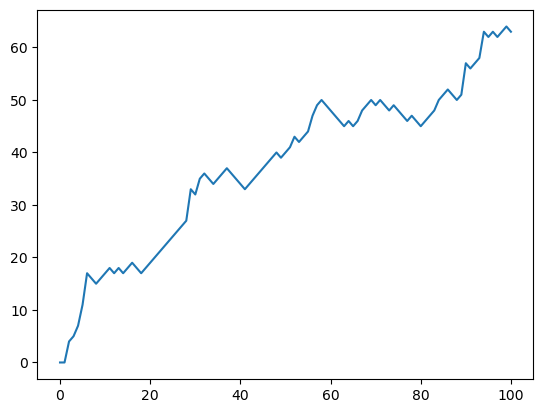

In [62]:
import matplotlib.pyplot as plt 
caminar = [0]

for x in range(100): 
    piso = caminar[-1]
    dado = np.random.randint(1, 7)
    #print(f" Estamos en el piso {piso}, y el dado ha salido {dado}")
    
    if dado <=2: 
        piso = max(0, piso - 1)
        #print(f"por tanto vamos al piso {piso}")
    elif dado <= 5:
        piso = piso + 1
        #print(f" por tanto vamos al piso {piso}")
    
    else: 
        piso = piso + np.random.randint(1, 7)
        #print(f"Vamos al piso {piso}")
    
    caminar.append(piso)
    #print(f"{caminar}")

print(caminar)

plt.plot(caminar)
plt.show()


# Monte Carlo: miles / cientos de simulaciones

[[0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 4, 3, 4, 8, 7, 8, 14, 15, 16, 15, 16, 17, 18, 19, 18, 17, 16, 17, 16, 15, 20, 21, 22, 21, 27, 29, 28, 29, 30, 31, 30, 31, 30, 31, 30, 32, 33, 32, 33, 34, 35, 36, 37, 36, 39, 38, 39, 40, 41, 42, 41, 42, 43, 44, 45, 46, 45, 44, 46, 47, 46, 0, 1, 7, 8, 7, 6, 7, 13, 19, 20, 21, 22, 28, 27, 28, 29, 31, 37, 0, 0, 0, 1, 2, 3, 4, 3, 4, 5], [0, 0, 2, 3, 4, 5, 6, 5, 4, 9, 10, 11, 12, 13, 14, 20, 19, 18, 19, 18, 17, 18, 17, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22, 21, 22, 21, 20, 19, 20, 19, 20, 21, 22, 21, 22, 23, 24, 25, 24, 23, 22, 23, 24, 27, 26, 27, 26, 25, 26, 28, 29, 28, 29, 35, 34, 35, 36, 35, 36, 37, 38, 39, 40, 39, 41, 42, 48, 49, 48, 54, 0, 1, 3, 2, 7, 12, 11, 15, 21, 22, 26, 25, 26, 27, 28, 29, 30, 31, 32, 37], [0, 0, 4, 6, 7, 8, 9, 10, 11, 10, 11, 12, 11, 10, 11, 10, 9, 8, 7, 6, 7, 8, 7, 8, 9, 10, 16, 17, 18, 21, 20, 23, 24, 25, 26, 25, 26, 25, 26, 25, 26, 27, 30, 31, 32, 33, 32, 33, 34, 35, 36, 40, 41, 42, 43, 42, 43, 44, 45, 51, 52, 53, 54, 

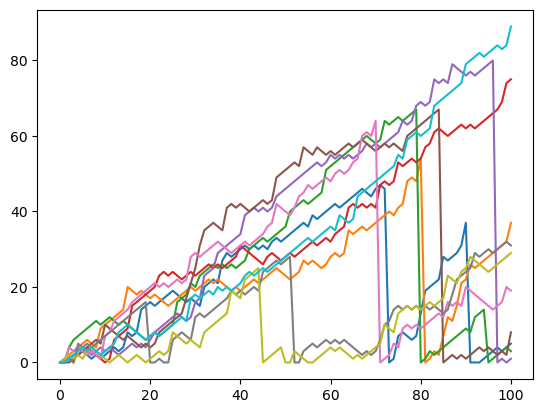

In [77]:
todos_los_experimentos = []


for e in range(10):
    caminar = [0]
    for x in range(100): 
        piso = caminar[-1]
        dado = np.random.randint(1, 7)
        #print(f" Estamos en el piso {piso}, y el dado ha salido {dado}")
        
        if dado <=2: 
            piso = max(0, piso - 1)
            #print(f"por tanto vamos al piso {piso}")
        elif dado <= 5:
            piso = piso + 1
            #print(f" por tanto vamos al piso {piso}")
        
        else: 
            piso = piso + np.random.randint(1, 7)
            #print(f"Vamos al piso {piso}")
        
        if np.random.rand() <= 0.01:
            piso = 0
        
        caminar.append(piso)
        #print(f"{caminar}")
    todos_los_experimentos.append(caminar)


print(todos_los_experimentos)
todos_los_experimentos_t = np.transpose(todos_los_experimentos)
todos_los_experimentos_t

plt.plot(todos_los_experimentos_t)
plt.show()

In [80]:
### probabilidad de haber terminado en al menos el piso 60

ends = todos_los_experimentos_t[-1, :]
ends = (ends>=60).mean()
ends


np.float64(0.2)

In [85]:
p_ever = (todos_los_experimentos_t >=60).any(axis=0).mean()
p_ever

np.float64(0.6)